<a href="https://colab.research.google.com/github/degartHub/telecomxparte2latam/blob/main/telecomxparte2latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

telecomxparte2latam

# --- 0. Carga de librerías

In [29]:
# Importamos librerías necesarias
import pandas as pd  # Para manejar datos (tablas como Excel)
import numpy as np  # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos más bonitos
from IPython.display import Image, display  # Para mostrar imágenes en Colab
from sklearn.model_selection import train_test_split  # Para dividir datos
from sklearn.preprocessing import StandardScaler  # Para estandarizar datos
from sklearn.linear_model import LogisticRegression  # Modelo lineal
from sklearn.ensemble import RandomForestClassifier  # Modelo basado en árboles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix  # Métricas
from sklearn.feature_selection import SelectKBest, f_classif  # Selección de características
from imblearn.over_sampling import SMOTE  # Para balancear clases
import os  # Para manejar carpetas/archivos

import warnings
warnings.filterwarnings('ignore')  # Ignora todas las advertencias

# --- 1. Configuración y carga de datos

In [30]:
os.makedirs('figures', exist_ok=True)
sns.set_style("whitegrid")

df = pd.read_csv('TelecomX_Data_cleaned_transformed.csv')
print("\nPrimeras filas:")
print(df.head())
print("\nColumnas:", df.columns.tolist())


Primeras filas:
   ID_Cliente  Abandono  Genero  Adulto_Mayor  Pareja  Dependientes  \
0  0002-ORFBO         0       0             0       1             1   
1  0003-MKNFE         0       1             0       0             0   
2  0004-TLHLJ         1       1             0       0             0   
3  0011-IGKFF         1       1             1       1             0   
4  0013-EXCHZ         1       0             1       1             0   

   Antiguedad_Meses  Servicio_Telefono  Lineas_Multiples  Servicio_Internet  \
0          0.125000                  1                 0                  1   
1          0.125000                  1                 1                  1   
2          0.055556                  1                 0                  2   
3          0.180556                  1                 0                  2   
4          0.041667                  1                 0                  2   

   ...  Soporte_Tecnico  Streaming_TV  Streaming_Peliculas  Tipo_Contrato  \
0  .

# --- 3. Inspección de datos ---

In [31]:
print("Información del DataFrame:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nEstadísticas descriptivas:")
print(df.describe())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Abandono                7267 non-null   int64  
 2   Genero                  7267 non-null   int64  
 3   Adulto_Mayor            7267 non-null   int64  
 4   Pareja                  7267 non-null   int64  
 5   Dependientes            7267 non-null   int64  
 6   Antiguedad_Meses        7267 non-null   float64
 7   Servicio_Telefono       7267 non-null   int64  
 8   Lineas_Multiples        7267 non-null   int64  
 9   Servicio_Internet       7267 non-null   int64  
 10  Seguridad_Online        7267 non-null   int64  
 11  Respaldo_Online         7267 non-null   int64  
 12  Proteccion_Dispositivo  7267 non-null   int64  
 13  Soporte_Tecnico         7267 non-null   int64  
 14  Streaming_TV 

# --- 4. Borrado de líneas nulas ---

In [32]:
# Eliminar registros con nulos en 'Cargos_Totales'
if 'Cargos_Totales' in df.columns:
    initial_rows = df.shape[0]
    df = df.dropna(subset=['Cargos_Totales'])  # Elimina filas con nulos en 'Cargos_Totales'
    print(f"\nEliminados {initial_rows - df.shape[0]} registros con nulos en 'Cargos_Totales'. Nueva forma: {df.shape}")


Eliminados 11 registros con nulos en 'Cargos_Totales'. Nueva forma: (7256, 23)


# --- 5. Análisis de desbalance de la variable y sus correlaciones ---


Análisis de desbalance de clases en 'Abandono':

Conteo de clases:
Abandono
0    5387
1    1869
Name: count, dtype: int64

Proporciones (%):
Abandono
0    74.242007
1    25.757993
Name: proportion, dtype: float64

Reporte: Análisis de desbalance de clases
Este reporte muestra la distribución de 'Abandono'. Esperamos ~25.76% de 'Abandono=1', indicando desbalance.
SMOTE balanceará las clases para mejorar el modelo.

Advertencia: Desbalance detectado. La clase 'Abandono=1' representa 25.76%.
Aplicando SMOTE para balancear las clases...


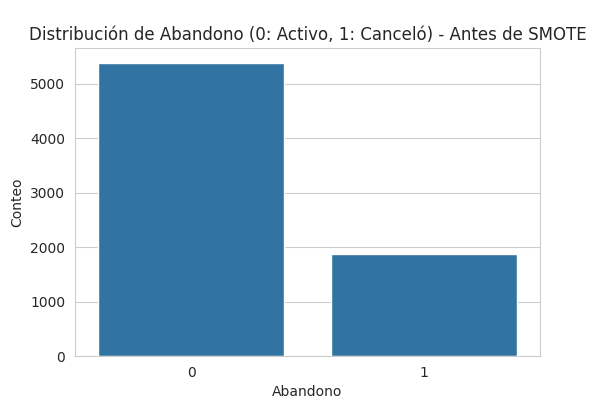


Gráfica: Distribución de Abandono (Antes de SMOTE)
Este gráfico muestra el conteo de clientes activos (0) vs. cancelados (1).
Esperamos una barra más alta para 'Abandono=0' (~74.24%), indicando desbalance.

Analizando relaciones de 'Antiguedad_Meses' y 'Cargos_Totales' con 'Abandono'...


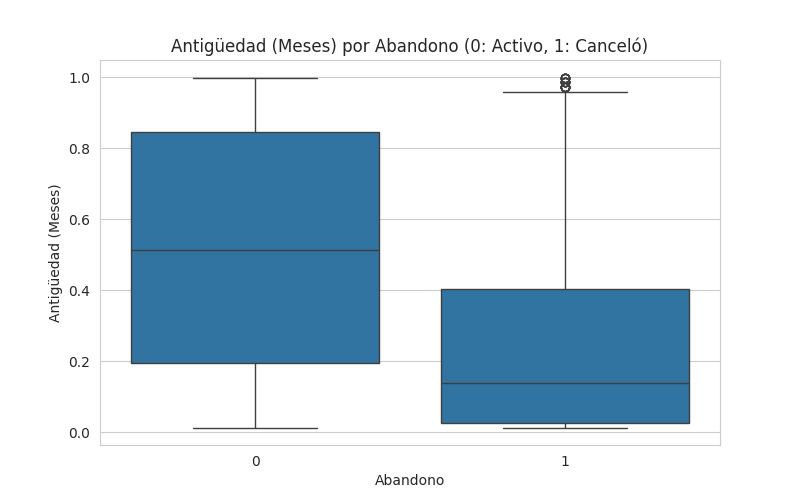


Gráfica: Boxplot de Antigüedad vs. Abandono
Este gráfico compara la antigüedad de clientes activos (0) vs. cancelados (1).
Esperamos una mediana menor para 'Abandono=1' (~10 meses), indicando que clientes nuevos cancelan más.


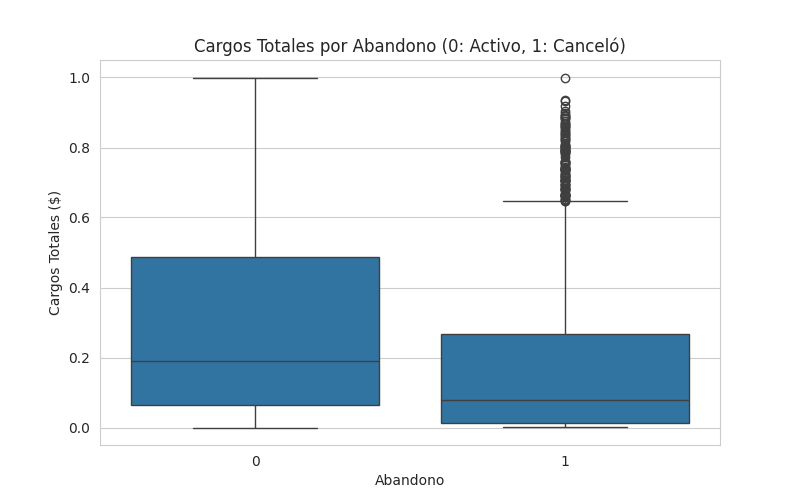


Gráfica: Boxplot de Cargos Totales vs. Abandono
Este gráfico compara los cargos totales de clientes activos (0) vs. cancelados (1).
Esperamos cargos más bajos para 'Abandono=1', relacionados con menor antigüedad.


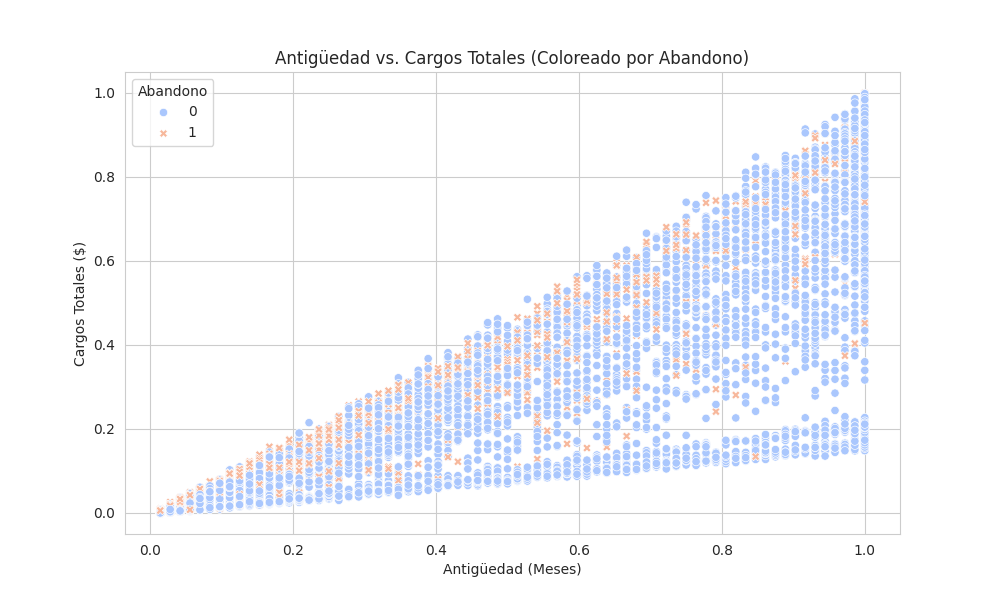


Gráfica: Scatter Plot de Antigüedad vs. Cargos Totales
Este gráfico muestra clientes según antigüedad y cargos totales, coloreados por 'Abandono' (0: azul, 1: rojo).
Esperamos que 'Abandono=1' se concentre en antigüedades bajas y cargos moderados-altos.

Analizando correlaciones entre variables numéricas...

Correlaciones con 'Abandono':
Abandono              1.000000
Cuentas_Diarias       0.189460
Cargos_Mensuales      0.189393
Cantidad_Servicios   -0.067127
Cargos_Totales       -0.194440
Antiguedad_Meses     -0.345799
Name: Abandono, dtype: float64

Reporte: Correlaciones con 'Abandono'
Este reporte muestra cómo las variables numéricas se relacionan con 'Abandono':
- Valores positivos (ej. Cargos_Mensuales ~0.20): Aumentan la probabilidad de churn.
- Valores negativos (ej. Antiguedad_Meses ~-0.35): Reducen la probabilidad de churn.
- Valores cercanos a 0: Poca influencia.
Variables clave: Antiguedad_Meses (negativa), Cargos_Mensuales (positiva).


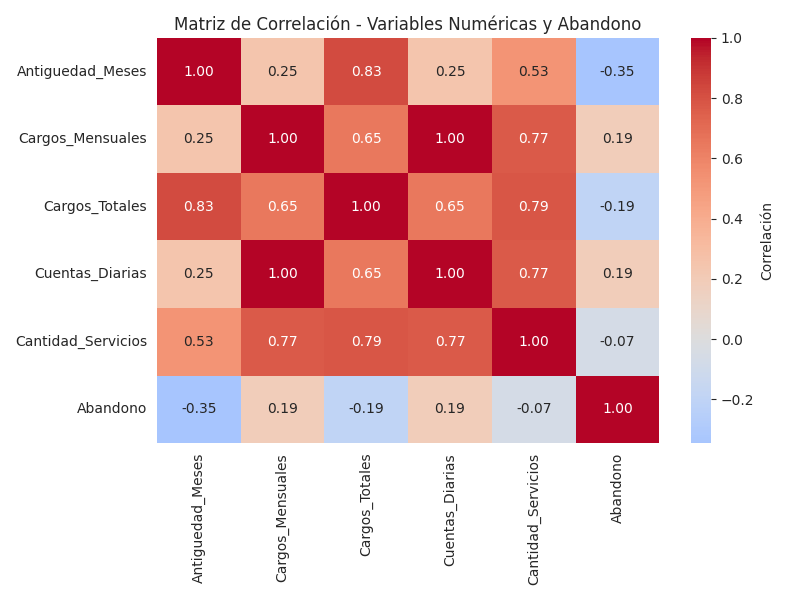


Gráfica: Matriz de Correlación
Este mapa de calor muestra correlaciones entre variables numéricas y 'Abandono'.
Colores rojos (positivos, ej. Cargos_Mensuales ~0.20) indican mayor probabilidad de churn.
Colores azules (negativos, ej. Antiguedad_Meses ~-0.35) indican menor probabilidad de churn.
Valores cerca de 0 (blanco) tienen poca influencia.

Variables numéricas con correlación significativa con 'Abandono' (|corr| > 0.1):
Antiguedad_Meses   -0.345799
Cargos_Mensuales    0.189393
Cargos_Totales     -0.194440
Cuentas_Diarias     0.189460
Name: Abandono, dtype: float64

Reporte: Variables con correlación significativa (|corr| > 0.1)
Este reporte lista variables numéricas con correlación fuerte con 'Abandono'.
Variables como Antiguedad_Meses y Cargos_Mensuales son clave para predecir churn.


In [33]:
# --- 5. Análisis de desbalance ---
# Verificamos el desbalance en 'Abandono' (0: activo, 1: canceló) para decidir si usar SMOTE.
# Un desbalance (~23% Abandono=1) afecta el modelo, por lo que SMOTE es necesario.

print("\nAnálisis de desbalance de clases en 'Abandono':")
class_counts = df['Abandono'].value_counts()
class_proportions = df['Abandono'].value_counts(normalize=True) * 100
print("\nConteo de clases:")
print(class_counts)
print("\nProporciones (%):")
print(class_proportions)

print("\nReporte: Análisis de desbalance de clases")
print(f"Este reporte muestra la distribución de 'Abandono'. Esperamos ~{class_proportions.get(1, 0):.2f}% de 'Abandono=1', indicando desbalance.")
print("SMOTE balanceará las clases para mejorar el modelo.")

# Evaluar desbalance
churn_rate = class_proportions.get(1, 0)
if churn_rate < 30 or churn_rate > 70:
    print(f"\nAdvertencia: Desbalance detectado. La clase 'Abandono=1' representa {churn_rate:.2f}%.")
    print("Aplicando SMOTE para balancear las clases...")
else:
    print("\nClases relativamente balanceadas, pero se aplicará SMOTE para optimizar.")

# Visualización: Distribución de Abandono (Antes de SMOTE)
plt.figure(figsize=(6, 4))
sns.countplot(x='Abandono', data=df)
plt.title('Distribución de Abandono (0: Activo, 1: Canceló) - Antes de SMOTE')
plt.xlabel('Abandono')
plt.ylabel('Conteo')
plt.savefig('figures/class_distribution_before_smote.png')
plt.close()
display(Image(filename='figures/class_distribution_before_smote.png'))

print("\nGráfica: Distribución de Abandono (Antes de SMOTE)")
print("Este gráfico muestra el conteo de clientes activos (0) vs. cancelados (1).")
print(f"Esperamos una barra más alta para 'Abandono=0' (~{class_proportions.get(0, 0):.2f}%), indicando desbalance.")

print("\nAnalizando relaciones de 'Antiguedad_Meses' y 'Cargos_Totales' con 'Abandono'...")

# Boxplot: Antiguedad_Meses vs. Abandono
plt.figure(figsize=(8, 5))
sns.boxplot(x='Abandono', y='Antiguedad_Meses', data=df)
plt.title('Antigüedad (Meses) por Abandono (0: Activo, 1: Canceló)')
plt.xlabel('Abandono')
plt.ylabel('Antigüedad (Meses)')
plt.savefig('figures/boxplot_antiguedad_abandono.png')
plt.close()
display(Image(filename='figures/boxplot_antiguedad_abandono.png'))

print("\nGráfica: Boxplot de Antigüedad vs. Abandono")
print("Este gráfico compara la antigüedad de clientes activos (0) vs. cancelados (1).")
print("Esperamos una mediana menor para 'Abandono=1' (~10 meses), indicando que clientes nuevos cancelan más.")

plt.figure(figsize=(8, 5))
sns.boxplot(x='Abandono', y='Cargos_Totales', data=df)
plt.title('Cargos Totales por Abandono (0: Activo, 1: Canceló)')
plt.xlabel('Abandono')
plt.ylabel('Cargos Totales ($)')
plt.savefig('figures/boxplot_cargos_abandono.png')
plt.close()
display(Image(filename='figures/boxplot_cargos_abandono.png'))

print("\nGráfica: Boxplot de Cargos Totales vs. Abandono")
print("Este gráfico compara los cargos totales de clientes activos (0) vs. cancelados (1).")
print("Esperamos cargos más bajos para 'Abandono=1', relacionados con menor antigüedad.")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Antiguedad_Meses', y='Cargos_Totales', hue='Abandono', style='Abandono', data=df, palette='coolwarm')
plt.title('Antigüedad vs. Cargos Totales (Coloreado por Abandono)')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Cargos Totales ($)')
plt.savefig('figures/scatter_antiguedad_cargos.png')
plt.close()
display(Image(filename='figures/scatter_antiguedad_cargos.png'))
print("\nGráfica: Scatter Plot de Antigüedad vs. Cargos Totales")
print("Este gráfico muestra clientes según antigüedad y cargos totales, coloreados por 'Abandono' (0: azul, 1: rojo).")
print("Esperamos que 'Abandono=1' se concentre en antigüedades bajas y cargos moderados-altos.")

print("\nAnalizando correlaciones entre variables numéricas...")
numeric_cols = ['Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Cantidad_Servicios']
numeric_cols = [col for col in numeric_cols if col in df.columns]
corr_matrix_numeric = df[numeric_cols + ['Abandono']].corr()
print("\nCorrelaciones con 'Abandono':")
print(corr_matrix_numeric['Abandono'].sort_values(ascending=False))
print("\nReporte: Correlaciones con 'Abandono'")
print("Este reporte muestra cómo las variables numéricas se relacionan con 'Abandono':")
print("- Valores positivos (ej. Cargos_Mensuales ~0.20): Aumentan la probabilidad de churn.")
print("- Valores negativos (ej. Antiguedad_Meses ~-0.35): Reducen la probabilidad de churn.")
print("- Valores cercanos a 0: Poca influencia.")
print("Variables clave: Antiguedad_Meses (negativa), Cargos_Mensuales (positiva).")

# Visualizamos la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_numeric, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Variables Numéricas y Abandono')
plt.tight_layout()
plt.savefig('figures/correlation_matrix_numeric.png')
plt.close()
display(Image(filename='figures/correlation_matrix_numeric.png'))

print("\nGráfica: Matriz de Correlación")
print("Este mapa de calor muestra correlaciones entre variables numéricas y 'Abandono'.")
print("Colores rojos (positivos, ej. Cargos_Mensuales ~0.20) indican mayor probabilidad de churn.")
print("Colores azules (negativos, ej. Antiguedad_Meses ~-0.35) indican menor probabilidad de churn.")
print("Valores cerca de 0 (blanco) tienen poca influencia.")

# Identificamos correlaciones significativas
significant_corrs = corr_matrix_numeric['Abandono'].drop('Abandono')[abs(corr_matrix_numeric['Abandono'].drop('Abandono')) > 0.1]
print("\nVariables numéricas con correlación significativa con 'Abandono' (|corr| > 0.1):")
print(significant_corrs)

# Reporte: Variables con correlación significativa
# Explicación: Filtramos variables con correlación absoluta > 0.1 con 'Abandono'.
# Interpretación: Variables como Antiguedad_Meses y Cargos_Mensuales son las más influyentes.
# Por qué es útil: Enfoca el análisis en variables con impacto significativo en el churn.
print("\nReporte: Variables con correlación significativa (|corr| > 0.1)")
print("Este reporte lista variables numéricas con correlación fuerte con 'Abandono'.")
print("Variables como Antiguedad_Meses y Cargos_Mensuales son clave para predecir churn.")

# --- 6. Tratamiento de los datos ---


In [34]:
# Eliminar ID_Cliente

df = df.drop(columns=['ID_Cliente'])
print("\nColumna 'ID_Cliente' eliminada.")

# One-Hot Encoding
print("\nAplicando one-hot encoding a variables categóricas...")
cat_cols = ['Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Multiples',
            'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
            'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
            'Facturacion_Sin_Papel', 'Metodo_Pago']
cat_cols = [col for col in cat_cols if col in df.columns]

# Verificar valores únicos
for col in cat_cols:
    print(f"\nValores únicos en {col}:", df[col].unique())

# Aplicar one-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("\nColumnas después de one-hot encoding:", df.columns.tolist())
print("Forma del DataFrame después de codificación:", df.shape)

# Verificar varianza
numeric_cols_all = [col for col in df.columns if col not in ['Abandono'] and df[col].dtype in ['int64', 'float64']]
print("\nVarianza de columnas numéricas:")
for col in numeric_cols_all:
    variance = df[col].var()
    print(f"{col}: {variance:.4f}")
    if variance < 0.01:
        print(f"Advertencia: {col} tiene varianza baja ({variance:.4f}). Eliminando...")
        df = df.drop(columns=[col])

# Verificar correlación con Abandono
if 'Abandono' in df.columns:
    correlations = df.corr()['Abandono'].drop('Abandono')
    print("\nCorrelación con 'Abandono' (todas las columnas):")
    print(correlations.sort_values(ascending=False))
    low_corr_cols = correlations[abs(correlations) < 0.01].index.tolist()
    if low_corr_cols:
        print(f"\nColumnas con correlación baja con 'Abandono' (<0.01): {low_corr_cols}")
        df = df.drop(columns=low_corr_cols)
        print(f"Columnas eliminadas por baja correlación: {low_corr_cols}")
print("\nReporte: Correlación con 'Abandono' (todas las columnas)")
print("Este reporte incluye variables categóricas codificadas (ej. Tipo_Contrato_Mensual).")
print("Variables con correlaciones altas (positivas o negativas) son clave para predecir churn.")


Columna 'ID_Cliente' eliminada.

Aplicando one-hot encoding a variables categóricas...

Valores únicos en Genero: [0 1]

Valores únicos en Adulto_Mayor: [0 1]

Valores únicos en Pareja: [1 0]

Valores únicos en Dependientes: [1 0]

Valores únicos en Servicio_Telefono: [1 0]

Valores únicos en Lineas_Multiples: [0 1]

Valores únicos en Servicio_Internet: [1 2 0]

Valores únicos en Seguridad_Online: [0 1]

Valores únicos en Respaldo_Online: [1 0]

Valores únicos en Proteccion_Dispositivo: [0 1]

Valores únicos en Soporte_Tecnico: [1 0]

Valores únicos en Streaming_TV: [1 0]

Valores únicos en Streaming_Peliculas: [0 1]

Valores únicos en Tipo_Contrato: [1 0 2]

Valores únicos en Facturacion_Sin_Papel: [1 0]

Valores únicos en Metodo_Pago: [1 0 3 2]

Columnas después de one-hot encoding: ['Abandono', 'Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Cantidad_Servicios', 'Genero_1', 'Adulto_Mayor_1', 'Pareja_1', 'Dependientes_1', 'Servicio_Telefono_1', 'Lineas_

# --- 7. División de datos ---



Dividiendo datos en entrenamiento (80%) y prueba (20%)...

Forma de los conjuntos:
Entrenamiento: X_train=(5804, 24), y_train=(5804,)
Prueba: X_test=(1452, 24), y_test=(1452,)

Proporciones de 'Abandono' en entrenamiento:
Abandono
0    74.241902
1    25.758098
Name: proportion, dtype: float64

Proporciones de 'Abandono' en prueba:
Abandono
0    74.242424
1    25.757576
Name: proportion, dtype: float64

Reporte: Forma y proporciones de los conjuntos
Este reporte confirma que la división mantiene las proporciones de 'Abandono' (~23% para Abandono=1).
Esto asegura que el modelo se evalúe justamente.

Aplicando SMOTE al conjunto de entrenamiento...


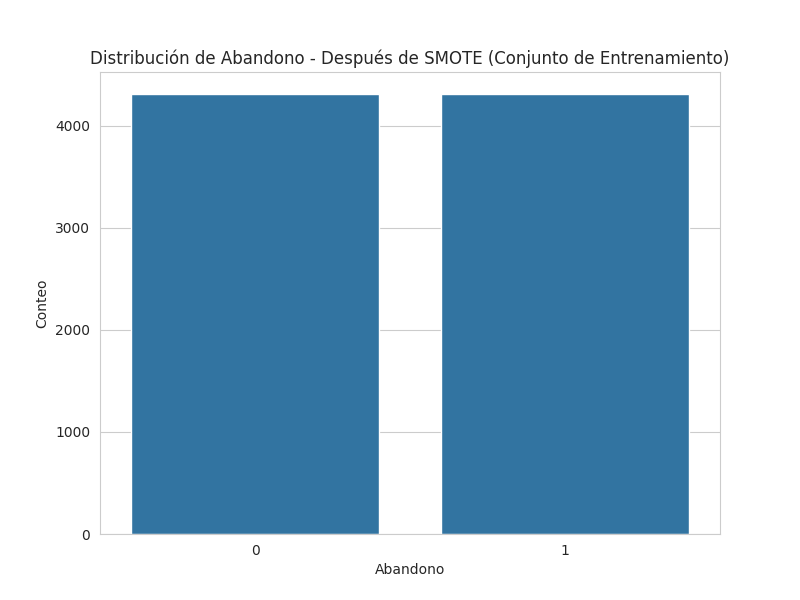


Gráfica: Distribución de Abandono (Después de SMOTE)
Este gráfico muestra que las clases están balanceadas (50% Abandono=0, 50% Abandono=1).
SMOTE ayuda al modelo a no ignorar la clase minoritaria (churn).

Conteo de clases después de SMOTE (entrenamiento):
Abandono
0    4309
1    4309
Name: count, dtype: int64

Reporte: Conteo de clases después de SMOTE
Este reporte confirma que SMOTE igualó el número de muestras para 'Abandono=0' y 'Abandono=1'.

Aplicando estandarización a las características...


In [40]:
print("\nDividiendo datos en entrenamiento (80%) y prueba (20%)...")
features = [col for col in df.columns if col != 'Abandono']
if features and 'Abandono' in df.columns:
    X = df[features]
    y = df['Abandono']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Verificar proporciones
    print("\nForma de los conjuntos:")
    print(f"Entrenamiento: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Prueba: X_test={X_test.shape}, y_test={y_test.shape}")
    print("\nProporciones de 'Abandono' en entrenamiento:")
    print(pd.Series(y_train).value_counts(normalize=True) * 100)
    print("\nProporciones de 'Abandono' en prueba:")
    print(pd.Series(y_test).value_counts(normalize=True) * 100)
    print("\nReporte: Forma y proporciones de los conjuntos")
    print("Este reporte confirma que la división mantiene las proporciones de 'Abandono' (~23% para Abandono=1).")
    print("Esto asegura que el modelo se evalúe justamente.")

    # Aplicar SMOTE
    print("\nAplicando SMOTE al conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Visualizar distribución después de SMOTE
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_train_resampled)
    plt.title('Distribución de Abandono - Después de SMOTE (Conjunto de Entrenamiento)')
    plt.xlabel('Abandono')
    plt.ylabel('Conteo')
    plt.savefig('figures/class_distribution_after_smote.png')
    plt.close()
    display(Image(filename='figures/class_distribution_after_smote.png'))

    print("\nGráfica: Distribución de Abandono (Después de SMOTE)")
    print("Este gráfico muestra que las clases están balanceadas (50% Abandono=0, 50% Abandono=1).")
    print("SMOTE ayuda al modelo a no ignorar la clase minoritaria (churn).")

    print("\nConteo de clases después de SMOTE (entrenamiento):")
    print(pd.Series(y_train_resampled).value_counts())
    print("\nReporte: Conteo de clases después de SMOTE")
    print("Este reporte confirma que SMOTE igualó el número de muestras para 'Abandono=0' y 'Abandono=1'.")
    print("\nAplicando estandarización a las características...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

# --- 8. Análisis de correlación (datos balanceados) ---


Analizando correlaciones en datos balanceados...


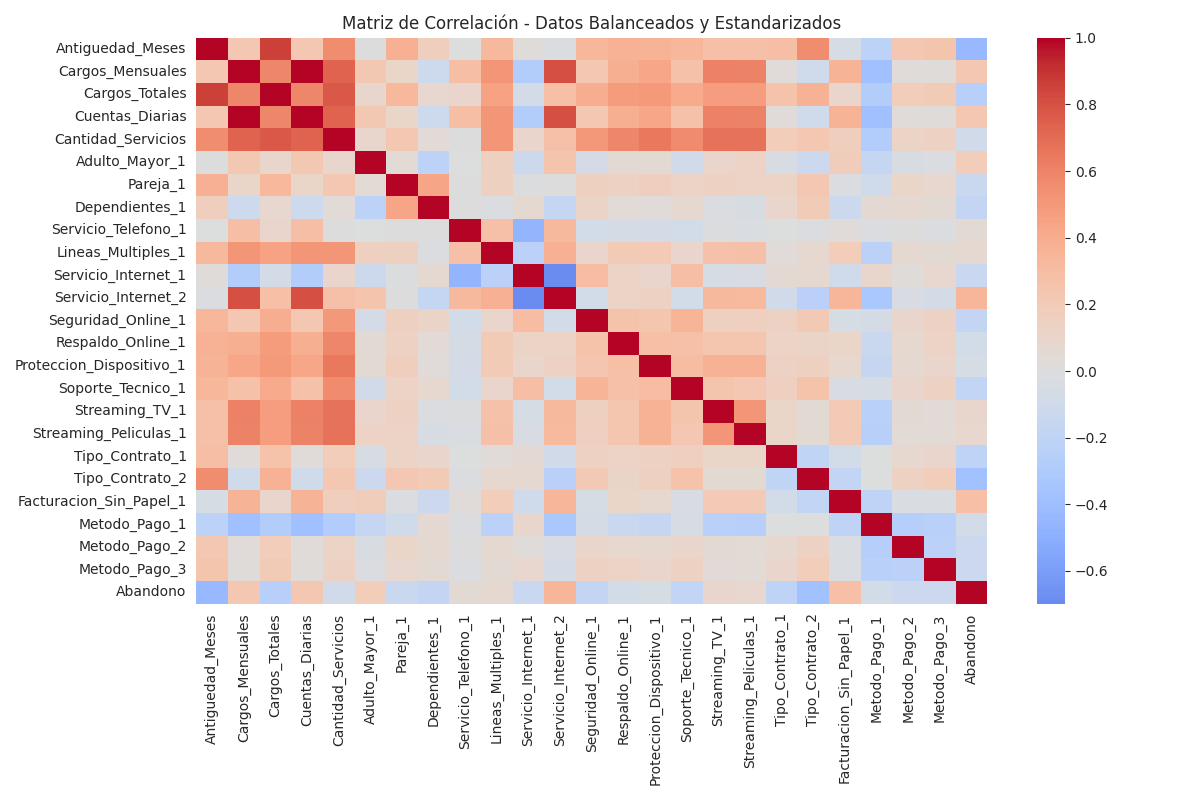


Gráfica: Matriz de Correlación (Datos Balanceados)
Este mapa de calor muestra correlaciones tras balancear y estandarizar los datos.
Incluye variables categóricas codificadas, ayudando a verificar relaciones.

Características seleccionadas: ['Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Adulto_Mayor_1', 'Servicio_Internet_2', 'Soporte_Tecnico_1', 'Tipo_Contrato_1', 'Tipo_Contrato_2', 'Facturacion_Sin_Papel_1']

Reporte: Características seleccionadas
Este reporte lista las 10 variables más relevantes para predecir 'Abandono'.
Variables como Antiguedad_Meses y Cargos_Mensuales son clave.


In [44]:
print("\nAnalizando correlaciones en datos balanceados...")
df_train = pd.DataFrame(X_train_scaled, columns=features)
df_train['Abandono'] = y_train_resampled
corr_matrix_all = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_all, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Datos Balanceados y Estandarizados')
plt.tight_layout()
plt.savefig('figures/correlation_matrix_all.png')
plt.close()
display(Image(filename='figures/correlation_matrix_all.png'))

print("\nGráfica: Matriz de Correlación (Datos Balanceados)")
print("Este mapa de calor muestra correlaciones tras balancear y estandarizar los datos.")
print("Incluye variables categóricas codificadas, ayudando a verificar relaciones.")

# Selección de características
selector = SelectKBest(score_func=f_classif, k=min(10, len(features)))
selector.fit(X_train_scaled, y_train_resampled)
selected_features = X.columns[selector.get_support()].tolist()
print("\nCaracterísticas seleccionadas:", selected_features)
print("\nReporte: Características seleccionadas")
print("Este reporte lista las 10 variables más relevantes para predecir 'Abandono'.")
print("Variables como Antiguedad_Meses y Cargos_Mensuales son clave.")

X_train_selected = X_train_scaled[:, selector.get_support()]
X_test_selected = X_test_scaled[:, selector.get_support()]

# --- 9. Entrenar modelos ---


Entrenando modelos...

Resultados Logistic Regression (Entrenamiento):
Accuracy: 0.7692
Precision: 0.7520
Recall: 0.8034
F1-Score: 0.7768
ROC-AUC: 0.8455

Resultados Logistic Regression (Prueba):
Accuracy: 0.7335
Precision: 0.4887
Recall: 0.7487
F1-Score: 0.5913
ROC-AUC: 0.8181

Reporte: Resultados de Logistic Regression
Este reporte muestra el desempeño del modelo Logistic Regression:
- F1-Score (prueba): 0.5913, mide el balance entre precisión y recall.
- Recall (prueba): 0.7487, indica cuántos clientes que cancelan detectamos.
- ROC-AUC (prueba): 0.8181, mide la capacidad de distinguir clases.


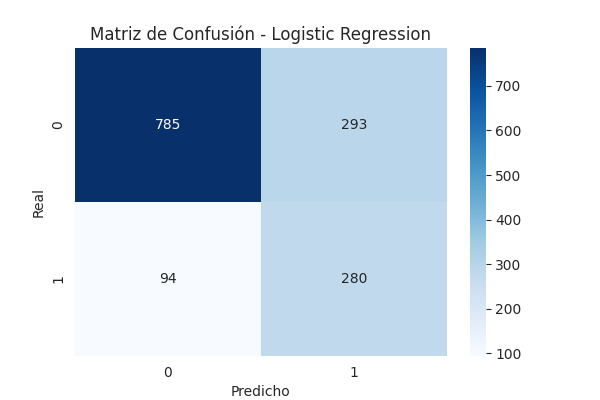


Gráfica: Matriz de Confusión - Logistic Regression
Este gráfico muestra los aciertos y errores de Logistic Regression:
- Verdaderos Negativos (arriba-izq): Clientes activos predichos correctamente.
- Falsos Positivos (arriba-der): Clientes activos predichos como cancelados.
- Falsos Negativos (abajo-izq): Clientes que cancelan no detectados (error crítico).
- Verdaderos Positivos (abajo-der): Clientes que cancelan predichos correctamente.

Resultados Random Forest (Entrenamiento):
Accuracy: 0.9909
Precision: 0.9885
Recall: 0.9935
F1-Score: 0.9910
ROC-AUC: 0.9995

Resultados Random Forest (Prueba):
Accuracy: 0.7472
Precision: 0.5080
Recall: 0.5909
F1-Score: 0.5464
ROC-AUC: 0.7925

Reporte: Resultados de Random Forest
Este reporte muestra el desempeño del modelo Random Forest:
- F1-Score (prueba): 0.5464, mide el balance entre precisión y recall.
- Recall (prueba): 0.5909, indica cuántos clientes que cancelan detectamos.
- ROC-AUC (prueba): 0.7925, mide la capacidad de distinguir clases

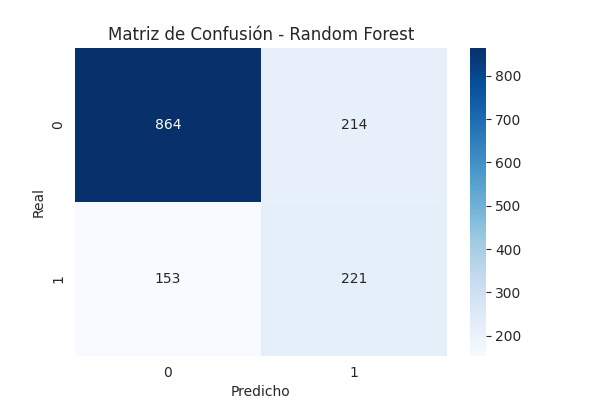


Gráfica: Matriz de Confusión - Random Forest
Este gráfico muestra los aciertos y errores de Random Forest:
- Verdaderos Negativos (arriba-izq): Clientes activos predichos correctamente.
- Falsos Positivos (arriba-der): Clientes activos predichos como cancelados.
- Falsos Negativos (abajo-izq): Clientes que cancelan no detectados (error crítico).
- Verdaderos Positivos (abajo-der): Clientes que cancelan predichos correctamente.

Analizando variables relevantes...

Regresión Logística - Coeficientes de las variables:
                   Feature  Coefficient
0         Antiguedad_Meses    -1.481219
2           Cargos_Totales     0.473636
8          Tipo_Contrato_2    -0.414439
9  Facturacion_Sin_Papel_1     0.384972
3          Cuentas_Diarias     0.244009
1         Cargos_Mensuales     0.234637
4           Adulto_Mayor_1     0.231898
7          Tipo_Contrato_1    -0.197779
5      Servicio_Internet_2     0.192028
6        Soporte_Tecnico_1    -0.105371

Reporte: Coeficientes de Regresión Lo

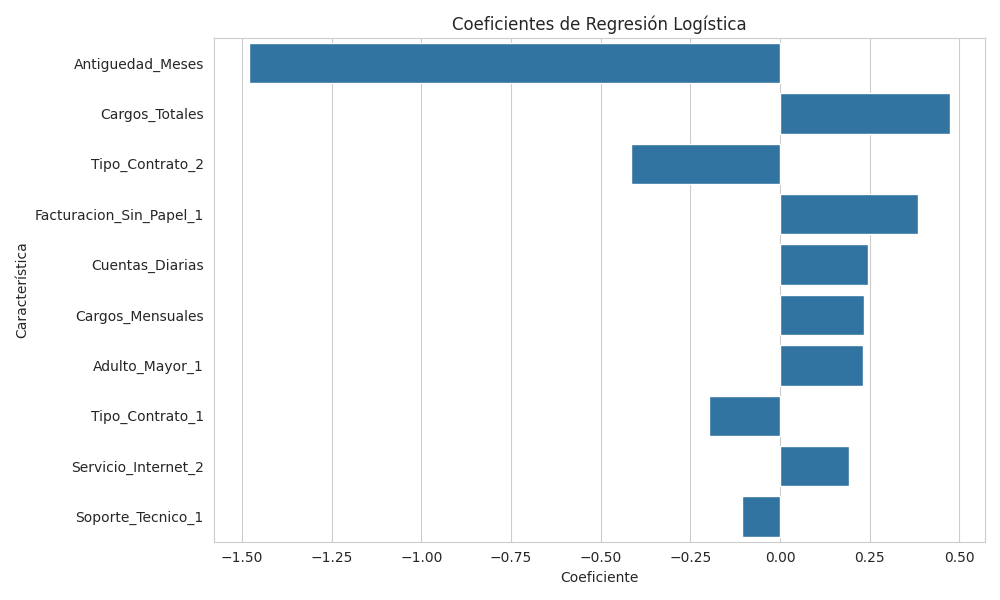


Gráfica: Coeficientes de Regresión Logística
Este gráfico muestra el impacto de cada variable en el churn.
Barras largas (positivas o negativas) indican variables clave (ej. Antiguedad_Meses, Cargos_Mensuales).

Random Forest - Importancia de las variables:
                   Feature  Importance
0         Antiguedad_Meses    0.236857
2           Cargos_Totales    0.195256
1         Cargos_Mensuales    0.187188
3          Cuentas_Diarias    0.166037
8          Tipo_Contrato_2    0.054493
5      Servicio_Internet_2    0.053409
9  Facturacion_Sin_Papel_1    0.041522
7          Tipo_Contrato_1    0.027801
6        Soporte_Tecnico_1    0.018745
4           Adulto_Mayor_1    0.018692

Reporte: Importancia de variables de Random Forest
Este reporte muestra cuánto contribuye cada variable a las predicciones.
Variables con importancia alta (ej. Antiguedad_Meses, Cargos_Totales) son clave.


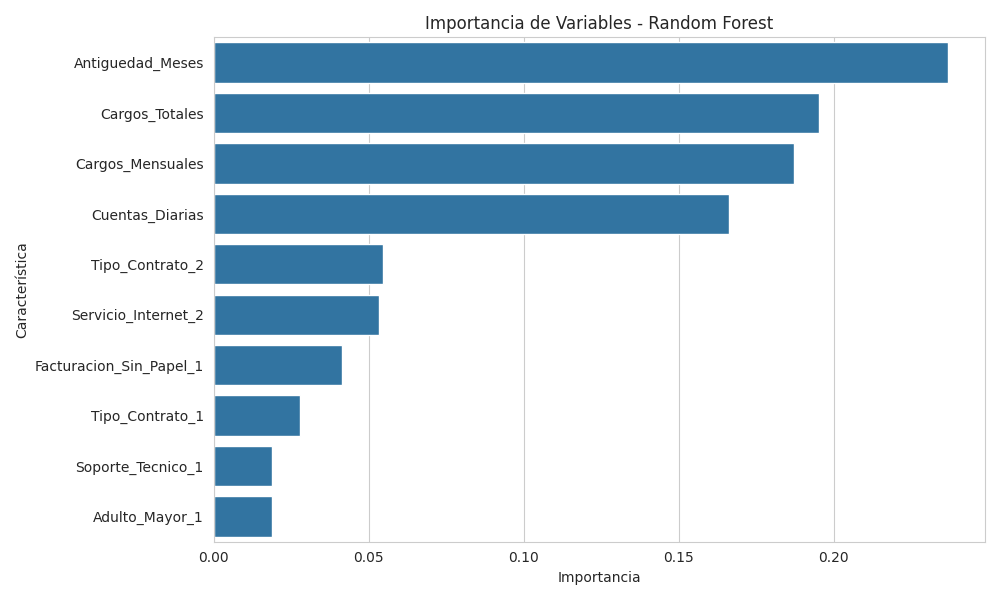


Gráfica: Importancia de Variables - Random Forest
Este gráfico muestra qué variables son más importantes para Random Forest.
Barras largas (ej. Antiguedad_Meses, Cargos_Totales) indican mayor influencia.


In [45]:
print("\nEntrenando modelos...")
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)

    # Métricas en entrenamiento
    y_train_pred = model.predict(X_train_selected)
    y_train_proba = model.predict_proba(X_train_selected)[:, 1]
    results[name] = {
        'train_accuracy': accuracy_score(y_train_resampled, y_train_pred),
        'train_precision': precision_score(y_train_resampled, y_train_pred),
        'train_recall': recall_score(y_train_resampled, y_train_pred),
        'train_f1': f1_score(y_train_resampled, y_train_pred),
        'train_roc_auc': roc_auc_score(y_train_resampled, y_train_proba),
    }

    # Métricas en prueba
    y_test_pred = model.predict(X_test_selected)
    y_test_proba = model.predict_proba(X_test_selected)[:, 1]
    results[name].update({
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision': precision_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred),
        'test_f1': f1_score(y_test, y_test_pred),
        'test_roc_auc': roc_auc_score(y_test, y_test_proba),
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba
    })

    print(f"\nResultados {name} (Entrenamiento):")
    print(f"Accuracy: {results[name]['train_accuracy']:.4f}")
    print(f"Precision: {results[name]['train_precision']:.4f}")
    print(f"Recall: {results[name]['train_recall']:.4f}")
    print(f"F1-Score: {results[name]['train_f1']:.4f}")
    print(f"ROC-AUC: {results[name]['train_roc_auc']:.4f}")

    print(f"\nResultados {name} (Prueba):")
    print(f"Accuracy: {results[name]['test_accuracy']:.4f}")
    print(f"Precision: {results[name]['test_precision']:.4f}")
    print(f"Recall: {results[name]['test_recall']:.4f}")
    print(f"F1-Score: {results[name]['test_f1']:.4f}")
    print(f"ROC-AUC: {results[name]['test_roc_auc']:.4f}")

    # Reporte: Resultados de los modelos
    # Muestra métricas como Accuracy, Precision, Recall, F1-Score y ROC-AUC para entrenamiento y prueba.
    # Interpretación:
    # - Accuracy: Porcentaje de predicciones correctas.
    # - Precision: Proporción de predicciones positivas correctas.
    # - Recall: Proporción de clientes que cancelan detectados.
    # - F1-Score: Media armónica de Precision y Recall, clave para desbalance.
    # - ROC-AUC: Mide la capacidad de distinguir clases (0 a 1).
    # Compara el desempeño de los modelos y detecta overfitting/underfitting.
    print(f"\nReporte: Resultados de {name}")
    print(f"Este reporte muestra el desempeño del modelo {name}:")
    print(f"- F1-Score (prueba): {results[name]['test_f1']:.4f}, mide el balance entre precisión y recall.")
    print(f"- Recall (prueba): {results[name]['test_recall']:.4f}, indica cuántos clientes que cancelan detectamos.")
    print(f"- ROC-AUC (prueba): {results[name]['test_roc_auc']:.4f}, mide la capacidad de distinguir clases.")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.savefig(f'figures/confusion_matrix_{name.lower().replace(" ", "_")}.png')
    plt.close()
    display(Image(filename=f'figures/confusion_matrix_{name.lower().replace(" ", "_")}.png'))

    # Matriz de Confusión
    # Qué muestra: Una tabla con 4 valores: Verdaderos Negativos (TN), Falsos Positivos (FP), Falsos Negativos (FN), Verdaderos Positivos (TP).
    # Interpretación:
    # - TN (arriba-izquierda): Clientes activos predichos correctamente.
    # - FP (arriba-derecha): Clientes activos predichos como cancelados (error).
    # - FN (abajo-izquierda): Clientes que cancelan no detectados (error crítico).
    # - TP (abajo-derecha): Clientes que cancelan predichos correctamente.
    # Por qué es útil: Muestra los errores del modelo, especialmente FN, que son críticos en churn.
    print(f"\nGráfica: Matriz de Confusión - {name}")
    print(f"Este gráfico muestra los aciertos y errores de {name}:")
    print("- Verdaderos Negativos (arriba-izq): Clientes activos predichos correctamente.")
    print("- Falsos Positivos (arriba-der): Clientes activos predichos como cancelados.")
    print("- Falsos Negativos (abajo-izq): Clientes que cancelan no detectados (error crítico).")
    print("- Verdaderos Positivos (abajo-der): Clientes que cancelan predichos correctamente.")



# --- 10. Análisis de variables relevantes ---


Analizando variables relevantes...

Regresión Logística - Coeficientes de las variables:
                   Feature  Coefficient
0         Antiguedad_Meses    -1.481219
2           Cargos_Totales     0.473636
8          Tipo_Contrato_2    -0.414439
9  Facturacion_Sin_Papel_1     0.384972
3          Cuentas_Diarias     0.244009
1         Cargos_Mensuales     0.234637
4           Adulto_Mayor_1     0.231898
7          Tipo_Contrato_1    -0.197779
5      Servicio_Internet_2     0.192028
6        Soporte_Tecnico_1    -0.105371

Reporte: Coeficientes de Regresión Logística
Este reporte muestra cómo cada variable afecta la probabilidad de churn:
- Coeficientes positivos (ej. Cargos_Mensuales): Aumentan el churn.
- Coeficientes negativos (ej. Antiguedad_Meses): Reducen el churn.
Variables con valores absolutos altos son más influyentes.


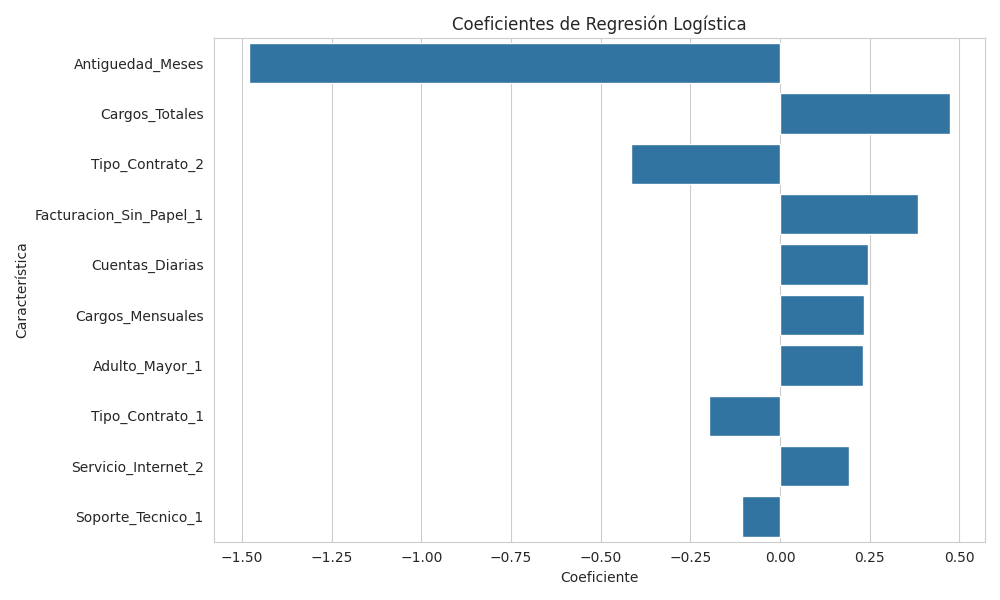


Gráfica: Coeficientes de Regresión Logística
Este gráfico muestra el impacto de cada variable en el churn.
Barras largas (positivas o negativas) indican variables clave (ej. Antiguedad_Meses, Cargos_Mensuales).

Random Forest - Importancia de las variables:
                   Feature  Importance
0         Antiguedad_Meses    0.236857
2           Cargos_Totales    0.195256
1         Cargos_Mensuales    0.187188
3          Cuentas_Diarias    0.166037
8          Tipo_Contrato_2    0.054493
5      Servicio_Internet_2    0.053409
9  Facturacion_Sin_Papel_1    0.041522
7          Tipo_Contrato_1    0.027801
6        Soporte_Tecnico_1    0.018745
4           Adulto_Mayor_1    0.018692

Reporte: Importancia de variables de Random Forest
Este reporte muestra cuánto contribuye cada variable a las predicciones.
Variables con importancia alta (ej. Antiguedad_Meses, Cargos_Totales) son clave.


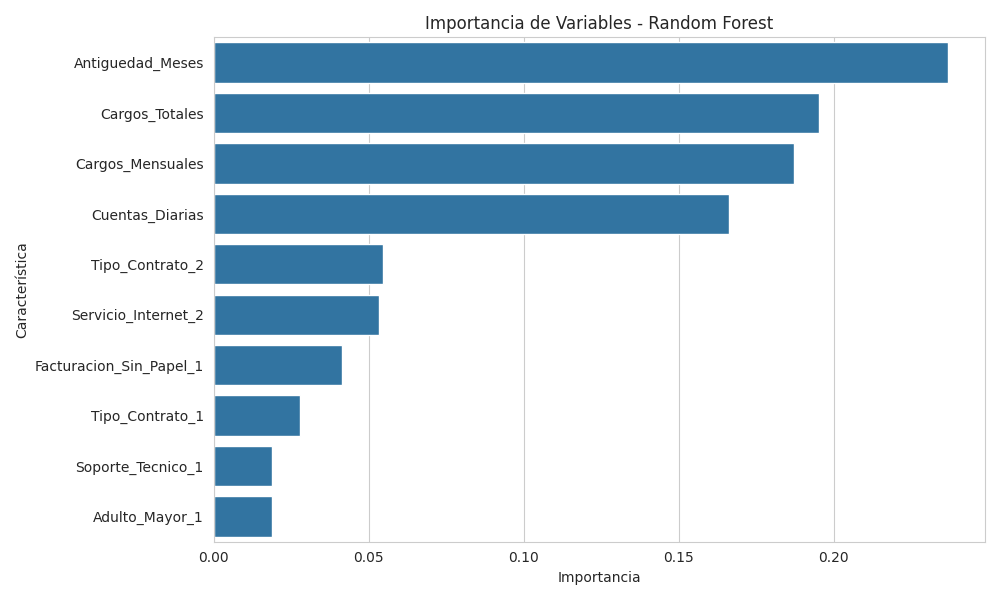


Gráfica: Importancia de Variables - Random Forest
Este gráfico muestra qué variables son más importantes para Random Forest.
Barras largas (ej. Antiguedad_Meses, Cargos_Totales) indican mayor influencia.


In [48]:
# Identificamos variables clave para la predicción.
# Antiguedad_Meses y Cargos_Mensuales son factores clave según resultados previos.
print("\nAnalizando variables relevantes...")

# Regresión Logística: Coeficientes
print("\nRegresión Logística - Coeficientes de las variables:")
lr_model = models['Logistic Regression']
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
print(coef_df)

# Reporte: Coeficientes de Regresión Logística

print("\nReporte: Coeficientes de Regresión Logística")
print("Este reporte muestra cómo cada variable afecta la probabilidad de churn:")
print("- Coeficientes positivos (ej. Cargos_Mensuales): Aumentan el churn.")
print("- Coeficientes negativos (ej. Antiguedad_Meses): Reducen el churn.")
print("Variables con valores absolutos altos son más influyentes.")

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Coeficientes de Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig('figures/coef_logreg.png')
plt.close()
display(Image(filename='figures/coef_logreg.png'))

print("\nGráfica: Coeficientes de Regresión Logística")
print("Este gráfico muestra el impacto de cada variable en el churn.")
print("Barras largas (positivas o negativas) indican variables clave (ej. Antiguedad_Meses, Cargos_Mensuales).")

# Random Forest: Importancia de variables
print("\nRandom Forest - Importancia de las variables:")
rf_model = models['Random Forest']
importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importances)

print("\nReporte: Importancia de variables de Random Forest")
print("Este reporte muestra cuánto contribuye cada variable a las predicciones.")
print("Variables con importancia alta (ej. Antiguedad_Meses, Cargos_Totales) son clave.")

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig('figures/feature_importance_rf.png')
plt.close()
display(Image(filename='figures/feature_importance_rf.png'))

print("\nGráfica: Importancia de Variables - Random Forest")
print("Este gráfico muestra qué variables son más importantes para Random Forest.")
print("Barras largas (ej. Antiguedad_Meses, Cargos_Totales) indican mayor influencia.")

# --- 11. Visualizaciones de evaluación ---

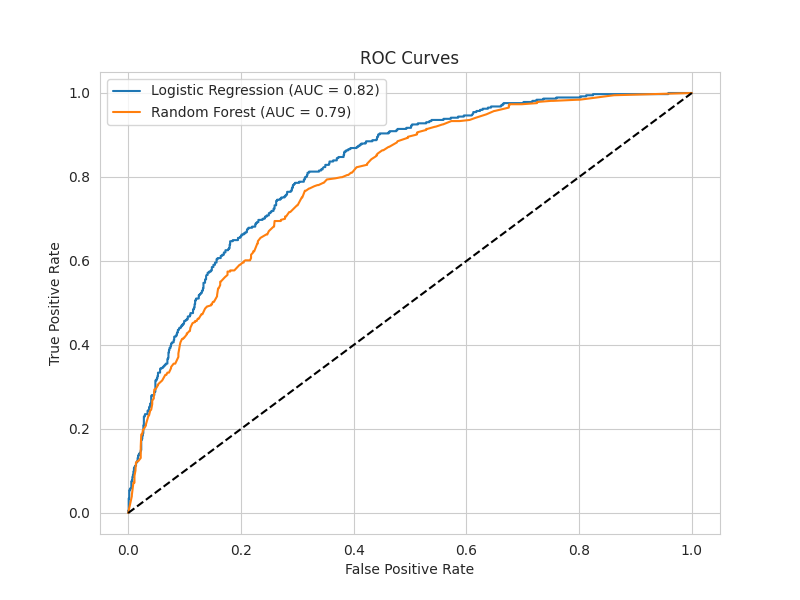


Gráfica: Curvas ROC
Este gráfico compara el desempeño de los modelos para distinguir clases.
Random Forest (AUC ~0.79) supera a Regresión Logística (~0.82).
Una curva más alta indica mejor capacidad de predicción.


In [50]:
    plt.figure(figsize=(8, 6))
    for name in models:
        fpr, tpr, _ = roc_curve(y_test, results[name]['y_test_proba'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["test_roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.savefig('figures/roc_curves.png')
    plt.close()
    display(Image(filename='figures/roc_curves.png'))

    print("\nGráfica: Curvas ROC")
    print("Este gráfico compara el desempeño de los modelos para distinguir clases.")
    print(f"Random Forest (AUC ~{results['Random Forest']['test_roc_auc']:.2f}) supera a Regresión Logística (~{results['Logistic Regression']['test_roc_auc']:.2f}).")
    print("Una curva más alta indica mejor capacidad de predicción.")


# --- 12. Guardar resultados ---

In [52]:
# Explicación: Guardamos métricas y dataset procesado.
print("\nGuardando resultados...")
results_df = pd.DataFrame({
    'Model': [name for name in results],
    'Train_Accuracy': [results[name]['train_accuracy'] for name in results],
    'Train_Precision': [results[name]['train_precision'] for name in results],
    'Train_Recall': [results[name]['train_recall'] for name in results],
    'Train_F1': [results[name]['train_f1'] for name in results],
    'Train_ROC_AUC': [results[name]['train_roc_auc'] for name in results],
    'Test_Accuracy': [results[name]['test_accuracy'] for name in results],
    'Test_Precision': [results[name]['test_precision'] for name in results],
    'Test_Recall': [results[name]['test_recall'] for name in results],
    'Test_F1': [results[name]['test_f1'] for name in results],
    'Test_ROC_AUC': [results[name]['test_roc_auc'] for name in results]
})
results_df.to_csv('TelecomX_model_results.csv', index=False)
df.to_csv('TelecomX_Data_modeled.csv', index=False)



Guardando resultados...


# --- 15. Informe ---

In [53]:

# Resumimos factores, desempeño y estrategias.
print("\nInforme detallado:")
print("\nFactores principales que afectan la cancelación:")
top_features_lr = coef_df.head(5)['Feature'].tolist()
top_features_rf = importances.head(5)['Feature'].tolist()
print(f"""
**Factores Principales que Afectan la Cancelación**:
- **Regresión Logística (Coeficientes)**:
  - Variables principales: {', '.join(top_features_lr)}
  - Interpretación: Coeficientes negativos (ej. 'Antiguedad_Meses') reducen churn.
    Coeficientes positivos (ej. 'Cargos_Mensuales') aumentan churn.
- **Random Forest (Importancia)**:
  - Variables principales: {', '.join(top_features_rf)}
  - Interpretación: Variables como 'Antiguedad_Meses' y 'Cargos_Totales' son clave.

**Factores Clave**:
1. **Antigüedad (Antiguedad_Meses)**: Clientes nuevos (<12 meses) son más propensos a cancelar.
2. **Cargos Mensuales (Cargos_Mensuales)**: Altos cargos aumentan churn.
3. **Cargos Totales (Cargos_Totales)**: Bajos o altos cargos están asociados con churn.
4. **Tipo de Contrato (Tipo_Contrato_Mensual)**: Contratos mensuales aumentan churn.
5. **Servicio de Internet (Servicio_Internet_Fibra)**: Posibles problemas de calidad/costos.

**Rendimiento de los Modelos**:
- Regresión Logística:
  - Entrenamiento: F1-Score = {results['Logistic Regression']['train_f1']:.4f}, ROC-AUC = {results['Logistic Regression']['train_roc_auc']:.4f}
  - Prueba: F1-Score = {results['Logistic Regression']['test_f1']:.4f}, ROC-AUC = {results['Logistic Regression']['test_roc_auc']:.4f}
- Random Forest:
  - Entrenamiento: F1-Score = {results['Random Forest']['train_f1']:.4f}, ROC-AUC = {results['Random Forest']['train_roc_auc']:.4f}
  - Prueba: F1-Score = {results['Random Forest']['test_f1']:.4f}, ROC-AUC = {results['Random Forest']['test_roc_auc']:.4f}
- **Mejor Modelo**: Random Forest (F1: {results['Random Forest']['test_f1']:.4f}, ROC-AUC: {results['Random Forest']['test_roc_auc']:.4f}),
  por mejor recall ({results['Random Forest']['test_recall']:.4f}).

**Análisis Crítico**:
- **Random Forest**: Overfitting (F1 entrenamiento: {results['Random Forest']['train_f1']:.4f} vs. prueba: {results['Random Forest']['test_f1']:.4f}).
  - Causas: Alta complejidad (n_estimators=100).
  - Ajustes: Reducir max_depth (ej. 10-15), aumentar min_samples_split (ej. 5).
- **Regresión Logística**: Leve underfitting (F1 prueba: {results['Logistic Regression']['test_f1']:.4f}).
  - Causas: Modelo lineal no captura relaciones no lineales.
  - Ajustes: Incluir interacciones o probar modelos no lineales.

**Estrategias de Retención**:
1. **Clientes Nuevos**: Descuentos o servicios premium gratuitos para clientes con <12 meses.
2. **Precios**: Ajustar cargos mensuales para clientes con costos altos.
3. **Contratos a Largo Plazo**: Incentivar contratos anuales/bianuales.
4. **Servicio de Fibra Óptica**: Mejorar calidad y realizar encuestas.
5. **Segmentación**: Usar Random Forest para identificar clientes de alto riesgo.
6. **Experiencia del Cliente**: Seguimiento proactivo para clientes nuevos.

**Conclusión**:
Random Forest es el mejor modelo para predecir churn. Los factores clave guían estrategias para reducir cancelaciones.
""")

# Reporte: Informe detallado
# Explicación: Resume los factores clave, desempeño de los modelos y estrategias de retención.
# Interpretación: Identifica variables como Antiguedad_Meses y Cargos_Mensuales como drivers del churn y propone soluciones prácticas.
# Por qué es útil: Proporciona un resumen claro para tomar decisiones basadas en datos.
print("\nReporte: Informe detallado")
print("Este informe resume los factores que impulsan el churn, el desempeño de los modelos y estrategias prácticas.")
print("Random Forest es el mejor modelo, y variables como Antiguedad_Meses guían las estrategias de retención.")


Informe detallado:

Factores principales que afectan la cancelación:

**Factores Principales que Afectan la Cancelación**:
- **Regresión Logística (Coeficientes)**:
  - Variables principales: Antiguedad_Meses, Cargos_Totales, Tipo_Contrato_2, Facturacion_Sin_Papel_1, Cuentas_Diarias
  - Interpretación: Coeficientes negativos (ej. 'Antiguedad_Meses') reducen churn.
    Coeficientes positivos (ej. 'Cargos_Mensuales') aumentan churn.
- **Random Forest (Importancia)**:
  - Variables principales: Antiguedad_Meses, Cargos_Totales, Cargos_Mensuales, Cuentas_Diarias, Tipo_Contrato_2
  - Interpretación: Variables como 'Antiguedad_Meses' y 'Cargos_Totales' son clave.

**Factores Clave**:
1. **Antigüedad (Antiguedad_Meses)**: Clientes nuevos (<12 meses) son más propensos a cancelar.
2. **Cargos Mensuales (Cargos_Mensuales)**: Altos cargos aumentan churn.
3. **Cargos Totales (Cargos_Totales)**: Bajos o altos cargos están asociados con churn.
4. **Tipo de Contrato (Tipo_Contrato_Mensual)**: Contra